In [5]:
from IPython.display import display, Image
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# Estymacja poziomu wody w Odrze na wysokości Głogowa

## Mapa przedstawiająca stacje hydrologiczne i meteorologiczne na Odrze i jej dopływach.

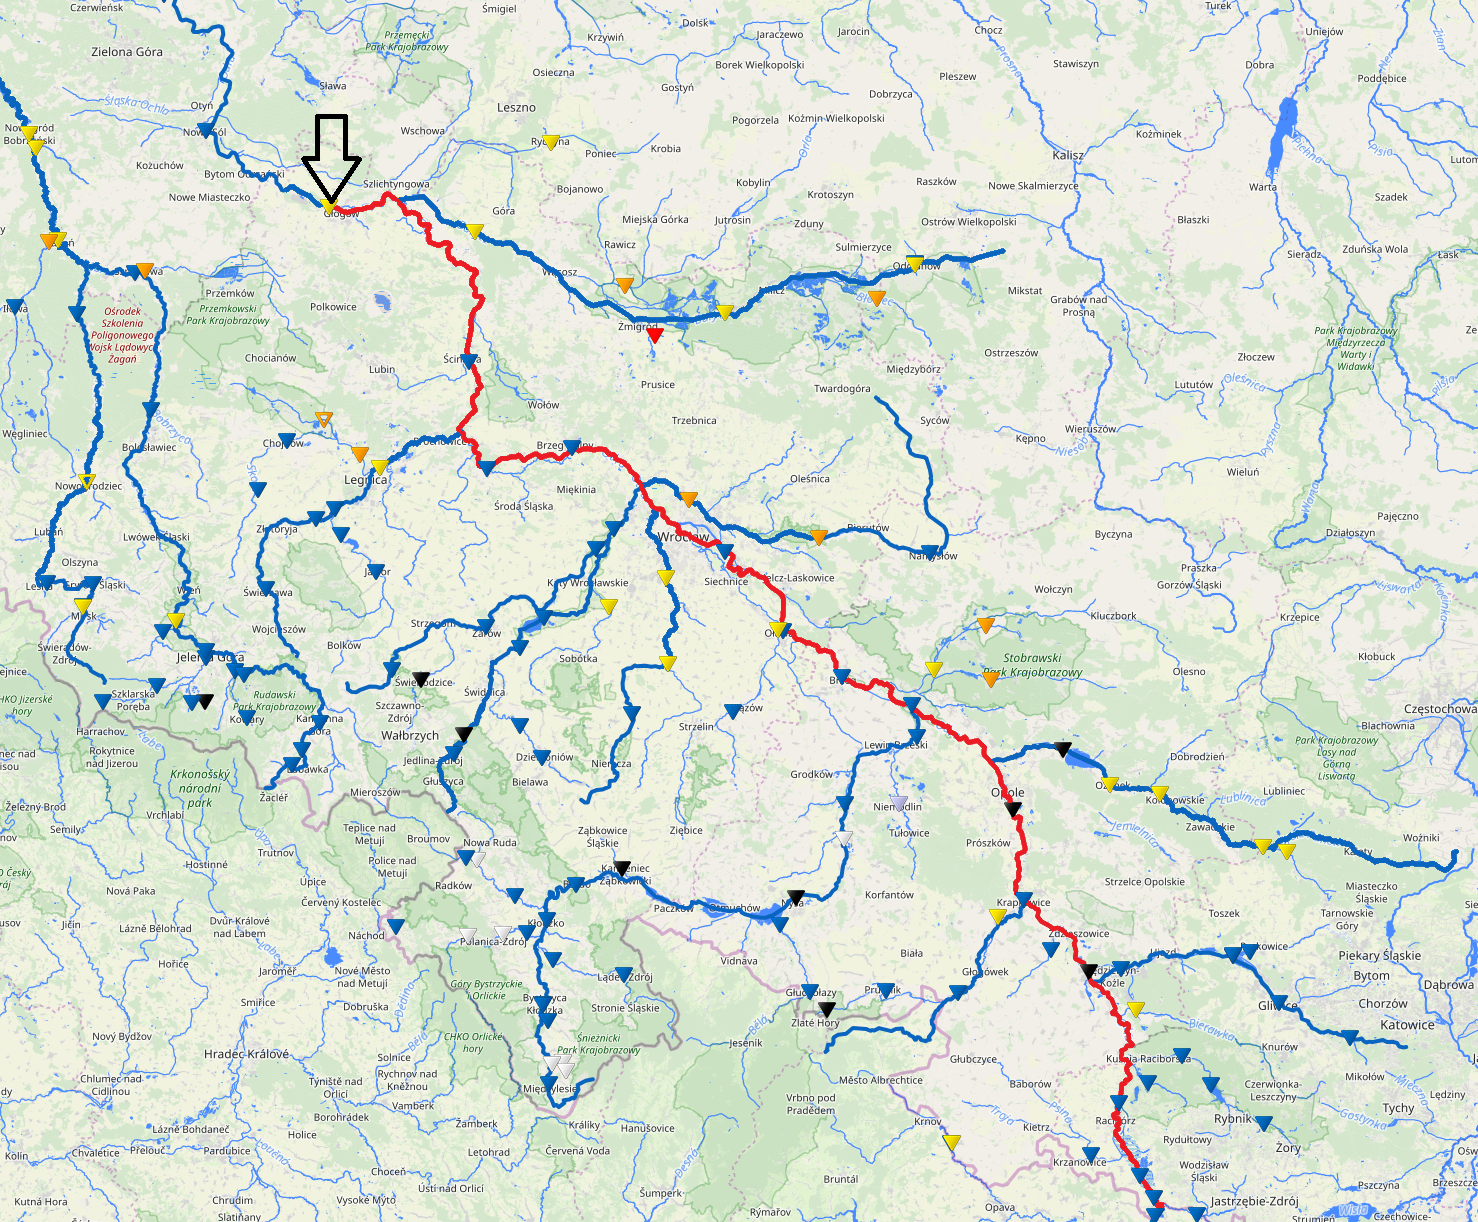

In [2]:
display(Image(filename='./data/imgw-map.png'))

In [7]:
data = pd.read_pickle(r"./data/B00020S.pkl")
data['Date']=pd.to_datetime(data['Date'])
data['B00020S']= data['B00020S'].str.replace(',', '.').astype(float)

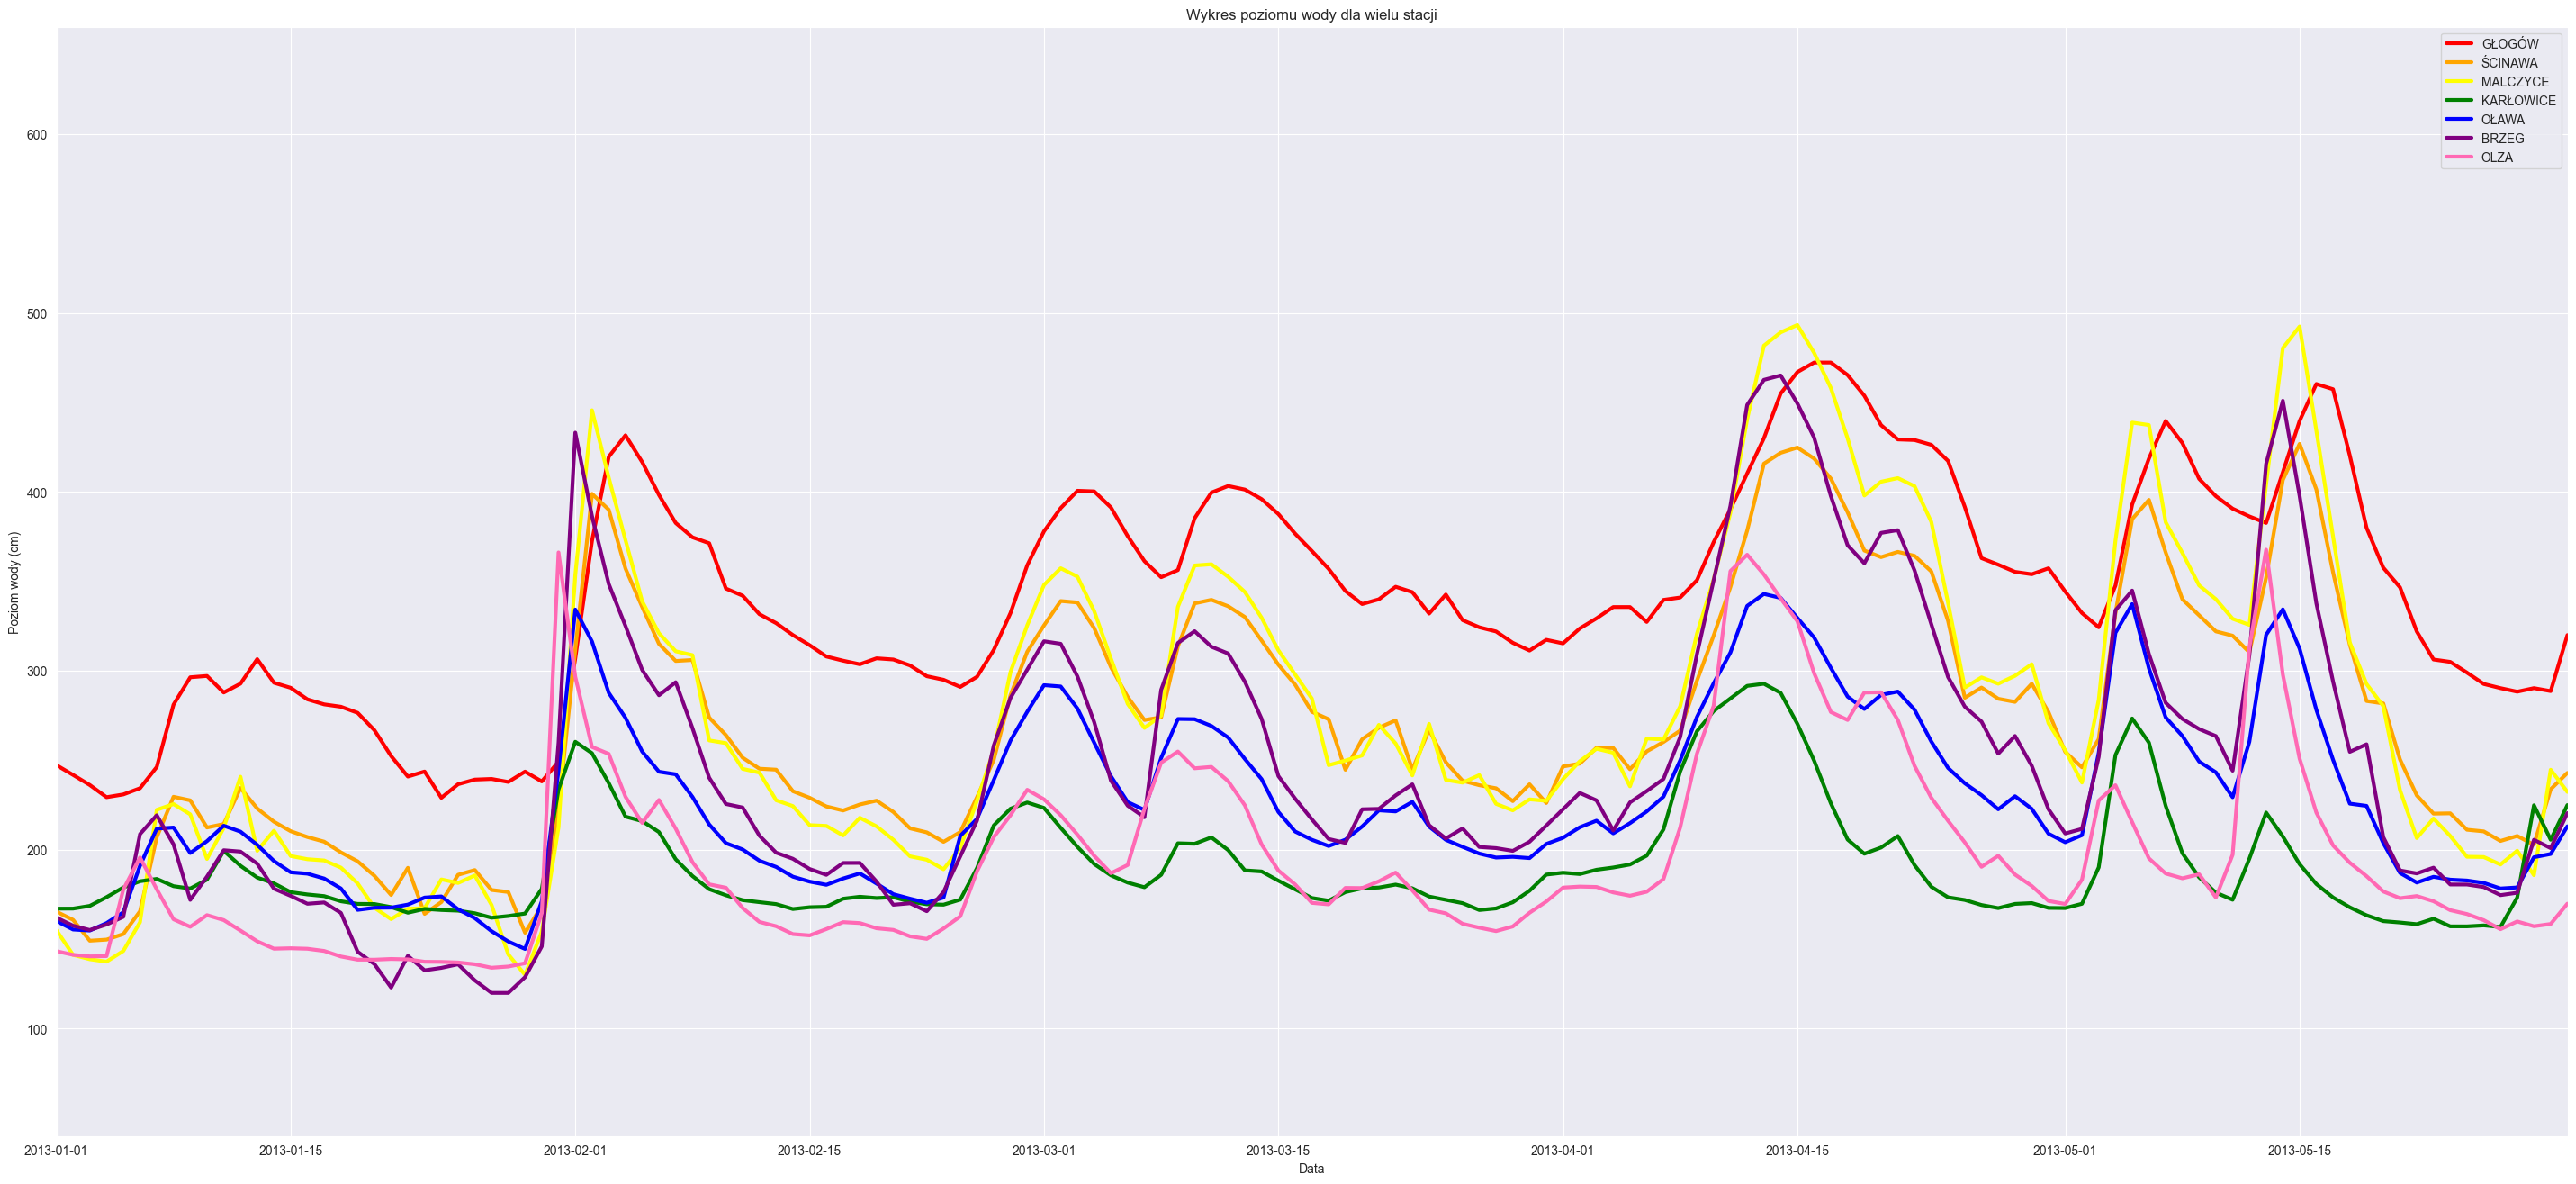

In [34]:
stations = ['GŁOGÓW', 'ŚCINAWA', 'MALCZYCE', 'KARŁOWICE', 'OŁAWA', 'BRZEG', 'OLZA']
years = [2013]
months = range(1,6)
custom_palette = [(1.0, 0.0, 0.0), (1.0, 0.647, 0.0), (1.0, 1.0, 0.0), (0.0, 0.502, 0.0), (0.0, 0.0, 1.0), (0.502, 0.0, 0.502),  (1.0, 0.412, 0.706)]

fig, ax = plt.subplots(figsize=(36,16))

data_temp = data.groupby(['Date', 'Station'])['B00020S'].mean().reset_index()

data_temp =  data_temp[(data_temp['Date'].dt.year.isin(years)) & (data_temp['Date'].dt.month.isin(months))]

# Dla 'GŁOGÓW' użyj koloru czerwonego
# data_station_glogow = data_temp[data_temp['Station'] == 'GŁOGÓW']
# ax.plot(data_station_glogow['Date'], data_station_glogow['B00020S']-90, label='GŁOGÓW', linewidth=2, color='red') # DLACZEGO -90 ?????

for i, station in enumerate(stations):
    data_station = data_temp[data_temp['Station'] == station]
    color = custom_palette[i]
    ax.plot(data_station['Date'], data_station['B00020S'], label=station, linewidth=3, color=color)

ax.legend()

ax.set_xlabel('Data')
ax.set_ylabel('Poziom wody (cm)')
ax.set_title('Wykres poziomu wody dla wielu stacji')

plt.xlim(data_temp['Date'].min(), data_temp['Date'].max())
plt.ylim(40, 660)

plt.show()